![(book cover)](https://covers.oreillystatic.com/images/0636920167433/cat.gif "(book cover)")
### **Programming Quantum Computers** by O'Reilly Media -  [**book Info**](http://shop.oreilly.com/product/0636920167433.do)  - [**all code samples**](https://oreilly-qc.github.io)

#### **Code samples for Chapter 7**
These code samples were written by Eric Johnston, Nic Harrigan, and Mercedes Gimeno-Segovia.

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
%matplotlib inline

|8> (1+0j) probability = 100.0%


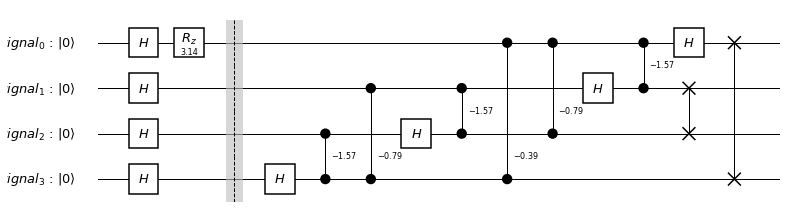

In [3]:
## Example 7-1: QFT to distinguish 3 states

# Set up the program
signal = QuantumRegister(4, name='signal')
qc = QuantumCircuit(signal)

def main():
    which_signal = 'A'  # Change this to test the different signals in the book

    ## prepare the signal
    qc.h(signal);
    if which_signal == 'A':
        qc.rz(math.radians(180), signal[0]);
    elif which_signal == 'B':
        qc.rz(math.radians(90), signal[0])
        qc.rz(math.radians(180), signal[1])
    elif which_signal == 'C':
        qc.rz(math.radians(45), signal[0])
        qc.rz(math.radians(90), signal[1])
        qc.rz(math.radians(180), signal[2])

    qc.barrier()
    QFT(signal)


def QFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit


|2> (1+0j) probability = 100.0%


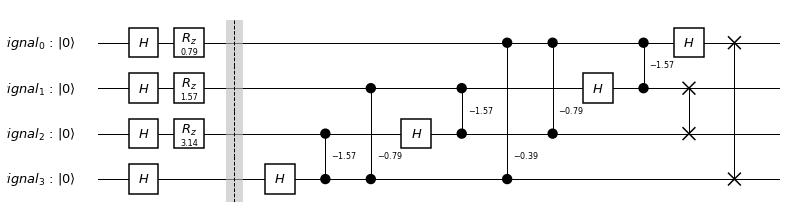

In [6]:
## Example 7-2: QFT of simple QPU signal

# Set up the program
signal = QuantumRegister(4, name='signal')
qc = QuantumCircuit(signal)

def main():
    ## prepare the signal
    qc.h(signal);
    qc.rz(math.radians(45), signal[0]);
    qc.rz(math.radians(90), signal[1]);
    qc.rz(math.radians(180), signal[2]);

    qc.barrier()
    QFT(signal)


def QFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit


|4> (0.5-0.5j) probability = 50.0%
|12> (0.5+0.5j) probability = 50.0%


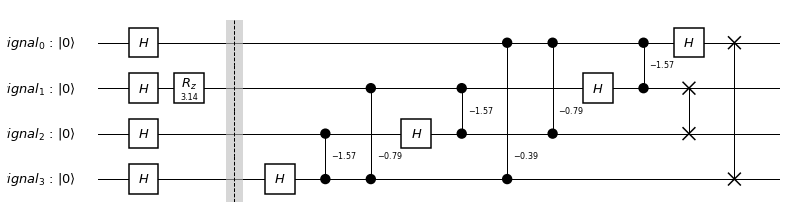

In [7]:
## Example 7-3: QFT square wave

# Set up the program
signal = QuantumRegister(4, name='signal')
qc = QuantumCircuit(signal)

def main():
    ## prepare the signal
    qc.h(signal);
    qc.rz(math.radians(180), signal[1]);

    qc.barrier()
    QFT(signal)


def QFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit


|8> (0.062-0.635j) probability = 40.7069%
|24> (0.062-0.206j) probability = 4.628%
|40> (0.063-0.117j) probability = 1.7658%
|56> (0.062-0.076j) probability = 0.962%
|72> (0.063-0.051j) probability = 0.657%
|88> (0.062-0.033j) probability = 0.4933%
|104> (0.063-0.019j) probability = 0.433%
|120> (0.063-0.006j) probability = 0.4005%
|136> (0.063+0.006j) probability = 0.4005%
|152> (0.062+0.019j) probability = 0.4205%
|168> (0.062+0.033j) probability = 0.4933%
|184> (0.063+0.051j) probability = 0.657%
|200> (0.063+0.076j) probability = 0.9745%
|216> (0.062+0.117j) probability = 1.7533%
|232> (0.062+0.206j) probability = 4.628%
|248> (0.063+0.635j) probability = 40.7194%


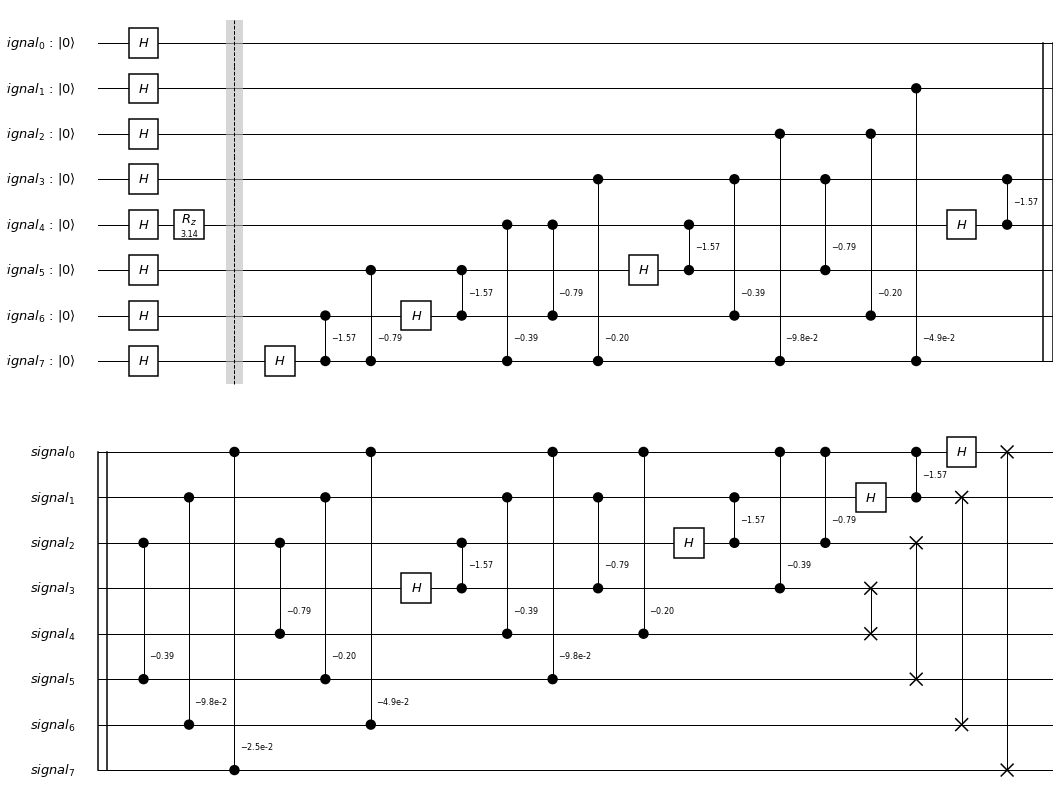

In [11]:
## Example 7-4: QFT big square wave

# Set up the program
signal = QuantumRegister(8, name='signal')
qc = QuantumCircuit(signal)

def main():
    ## prepare the signal
    qc.h(signal);
    qc.rz(math.radians(180), signal[4]);

    qc.barrier()
    QFT(signal)


def QFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit


|0> (0.25+0j) probability = 6.25%
|1> (0.096-0.231j) probability = 6.2577%
|2> (-0.177-0.177j) probability = 6.2658%
|3> (-0.231+0.096j) probability = 6.2577%
|4> 0.25j probability = 6.25%
|5> (0.231+0.096j) probability = 6.2577%
|6> (0.177-0.177j) probability = 6.2658%
|7> (-0.096-0.231j) probability = 6.2577%
|8> (-0.25+0j) probability = 6.25%
|9> (-0.096+0.231j) probability = 6.2577%
|10> (0.177+0.177j) probability = 6.2658%
|11> (0.231-0.096j) probability = 6.2577%
|12> -0.25j probability = 6.25%
|13> (-0.231-0.096j) probability = 6.2577%
|14> (-0.177+0.177j) probability = 6.2658%
|15> (0.096+0.231j) probability = 6.2577%


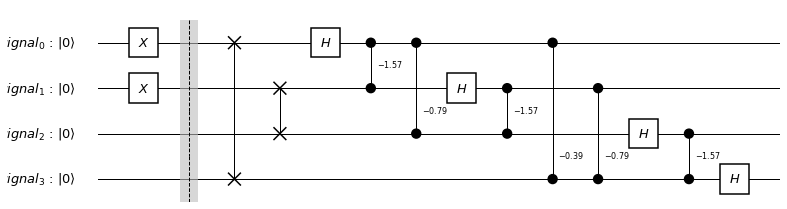

In [4]:
## Example 7-5: QFT frequency to state

# Set up the program
signal = QuantumRegister(4, name='signal')
qc = QuantumCircuit(signal)

def main():
    ## prepare the signal
    qc.x(signal[0])
    qc.x(signal[1])

    qc.barrier()
    invQFT(signal)


def invQFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    # Start the inverse QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[j], qreg[k])
        qc.h(qreg[j])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit


|0> (0.354+0j) probability = 12.5316%
|1> (0.327+0j) probability = 10.6929%
|2> (0.25+0j) probability = 6.25%
|3> (0.135+0j) probability = 1.8225%
|5> (-0.135+0j) probability = 1.8225%
|6> (-0.25+0j) probability = 6.25%
|7> (-0.327+0j) probability = 10.6929%
|8> (-0.354+0j) probability = 12.5316%
|9> (-0.327+0j) probability = 10.6929%
|10> (-0.25+0j) probability = 6.25%
|11> (-0.135+0j) probability = 1.8225%
|13> (0.135+0j) probability = 1.8225%
|14> (0.25+0j) probability = 6.25%
|15> (0.327+0j) probability = 10.6929%


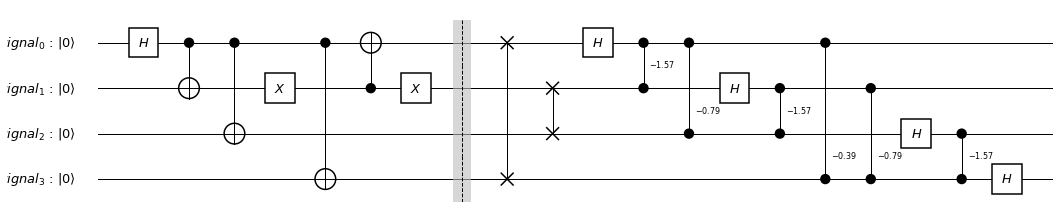

In [6]:
## Example 7-6: QFT prepare a state

# Set up the program
signal = QuantumRegister(4, name='signal')
qc = QuantumCircuit(signal)

def main():
    ## prepare the signal
    qc.h(signal[0]);
    qc.cx(signal[0], signal[1]);
    qc.cx(signal[0], signal[2]);
    qc.cx(signal[0], signal[3]);
    qc.x(signal[1]);
    qc.cx(signal[1], signal[0]);
    qc.x(signal[1]);

    qc.barrier()
    invQFT(signal)


def invQFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    # Start the inverse QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[j], qreg[k])
        qc.h(qreg[j])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit


|0> (0.25+0j) probability = 6.25%
|1> (0.231+0.096j) probability = 6.2577%
|2> (0.177+0.177j) probability = 6.2658%
|3> (0.096+0.231j) probability = 6.2577%
|4> 0.25j probability = 6.25%
|5> (-0.096+0.231j) probability = 6.2577%
|6> (-0.177+0.177j) probability = 6.2658%
|7> (-0.231+0.096j) probability = 6.2577%
|8> (-0.25+0j) probability = 6.25%
|9> (-0.231-0.096j) probability = 6.2577%
|10> (-0.177-0.177j) probability = 6.2658%
|11> (-0.096-0.231j) probability = 6.2577%
|12> -0.25j probability = 6.25%
|13> (0.096-0.231j) probability = 6.2577%
|14> (0.177-0.177j) probability = 6.2658%
|15> (0.231-0.096j) probability = 6.2577%


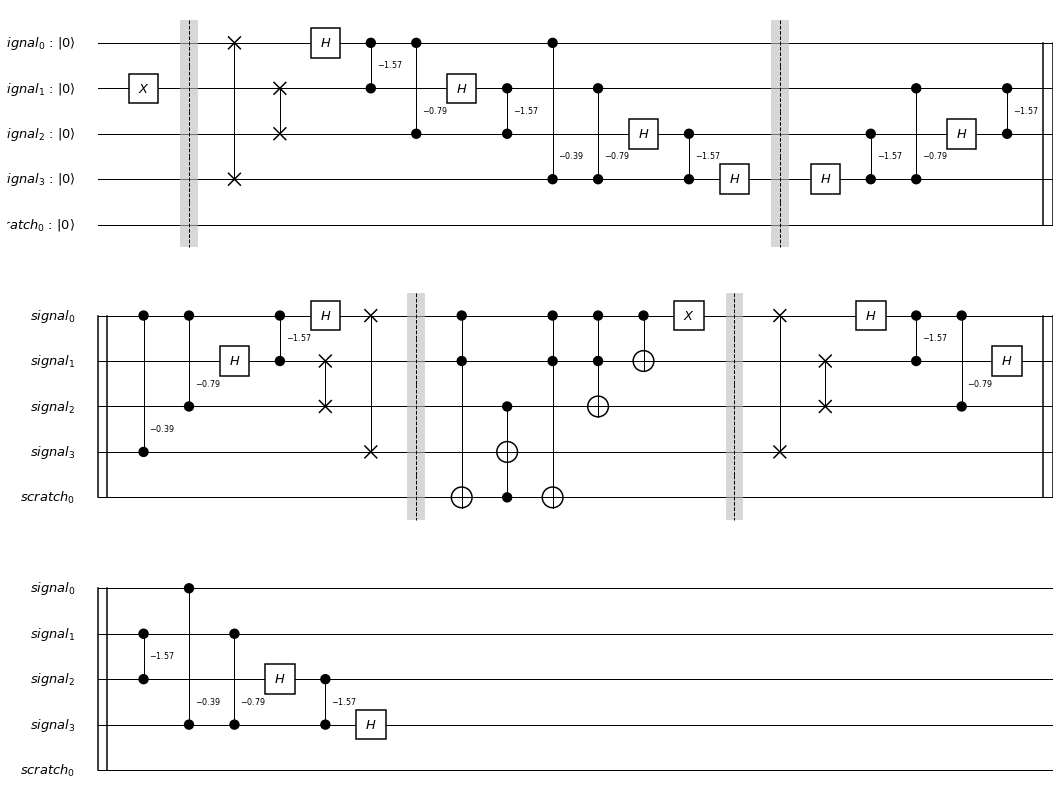

In [9]:
## Example 7-7: Frequency manipulation

# Set up the program
signal = QuantumRegister(4, name='signal')
scratch = QuantumRegister(1, name='scratch')
qc = QuantumCircuit(signal, scratch)

def main():
    ## Prepare a complex sinuisoidal signal
    freq = 2;
    for i in range(len(signal)):
        if (1 << i) & freq:
            qc.x(signal[i]);
    qc.barrier()
    invQFT(signal)

    ## Move to frequency space with QFT
    qc.barrier()
    QFT(signal)

    ## Increase the frequency of signal
    qc.barrier()
    add_int(signal, 1)

    # Move back from frequency space
    qc.barrier()
    invQFT(signal)

def QFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

def invQFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    # Start the inverse QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[j], qreg[k])
        qc.h(qreg[j])

def add_int(qdest, rhs):
    reverse_to_subtract = False
    if rhs == 0:
        return
    elif rhs < 0:
        rhs = -rhs
        reverse_to_subtract = True
    ops = []
    add_val = int(rhs)
    condition_mask = (1 << len(qdest)) - 1

    add_val_mask = 1
    while add_val_mask <= add_val:
        cmask = condition_mask & ~(add_val_mask - 1)
        if add_val_mask & add_val:
            add_shift_mask = 1 << (len(qdest) - 1)
            while add_shift_mask >= add_val_mask:
                cmask &= ~add_shift_mask
                ops.append((add_shift_mask, cmask))
                add_shift_mask >>= 1
        condition_mask &= ~add_val_mask
        add_val_mask <<= 1
    if reverse_to_subtract:
        ops.reverse()
    for inst in ops:
        op_qubits = []
        mask = 1
        for i in range(len(qdest)):
            if inst[1] & (1 << i):
                op_qubits.append(qdest[i])
        for i in range(len(qdest)):
            if inst[0] & (1 << i):
                op_qubits.append(qdest[i])
        multi_cx(op_qubits)

def multi_cz(qubits):
    ## This will perform a CCCCCZ on as many qubits as we want,
    ## as long as we have enough scratch qubits
    multi_cx(qubits, do_cz=True)

def multi_cx(qubits, do_cz=False):
    ## This will perform a CCCCCX with as many conditions as we want,
    ## as long as we have enough scratch qubits
    ## The last qubit in the list is the target.
    target = qubits[-1]
    conds = qubits[:-1]
    scratch_index = 0
    ops = []
    while len(conds) > 2:
        new_conds = []
        for i in range(len(conds)//2):
            ops.append((conds[i * 2], conds[i * 2 + 1], scratch[scratch_index]))
            new_conds.append(scratch[scratch_index])
            scratch_index += 1
        if len(conds) & 1:
            new_conds.append(conds[-1])
        conds = new_conds
    for op in ops:
        qc.ccx(op[0], op[1], op[2])
    if do_cz:
        qc.h(target)
    if len(conds) == 0:
        qc.x(target)
    elif len(conds) == 1:
        qc.cx(conds[0], target)
    else:
        qc.ccx(conds[0], conds[1], target)
    if do_cz:
        qc.h(target)
    ops.reverse()
    for op in ops:
        qc.ccx(op[0], op[1], op[2])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit


|0> (0.25+0j) probability = 6.25%
|1> (0.235+0.086j) probability = 6.2621%
|2> (0.192+0.161j) probability = 6.2785%
|3> (0.125+0.217j) probability = 6.2714%
|4> (0.043+0.246j) probability = 6.2365%
|5> (-0.043+0.246j) probability = 6.2365%
|6> (-0.125+0.217j) probability = 6.2714%
|7> (-0.192+0.161j) probability = 6.2785%
|8> (-0.235+0.086j) probability = 6.2621%
|9> (-0.25+0j) probability = 6.25%
|10> (-0.235-0.086j) probability = 6.2621%
|11> (-0.192-0.161j) probability = 6.2785%
|12> (-0.125-0.217j) probability = 6.2714%
|13> (-0.043-0.246j) probability = 6.2365%
|14> (0.043-0.246j) probability = 6.2365%
|15> (0.125-0.217j) probability = 6.2714%


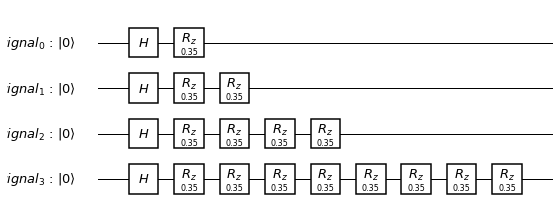

In [14]:
## Example 7-8: QFT rotating phases

# Set up the program
signal = QuantumRegister(4, name='signal')
qc = QuantumCircuit(signal)

def main():

    ## Rotate kth state in register by k times 20 degrees
    phi = 20;

    ## First HAD so that we can see the result for all k values at once
    qc.h(signal);

    ## Apply 2^k phase operations to kth qubit
    for i in range(4):
        val = 1 << i
        for j in range(val):
            qc.rz(math.radians(phi), signal[i]);

def QFT(qreg):
    ## This QFT implementation is adapted from IBM's sample:
    ##   https://github.com/Qiskit/qiskit-terra/blob/master/examples/python/qft.py
    ## ...with a few adjustments to match the book QFT implementation exactly
    n = len(qreg)
    for j in range(n):
        for k in range(j):
            qc.cu1(-math.pi/float(2**(j-k)), qreg[n-j-1], qreg[n-k-1])
        qc.h(qreg[n-j-1])
    # Now finish the QFT by reversing the order of the qubits
    for j in range(n//2):
        qc.swap(qreg[j], qreg[n-j-1])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))
qc.draw()        # draw the circuit
